## Lab 2 - Twitter and MongoDB

In [15]:
# standard library:
import os  

from pprint import pprint

# other modules:
import matplotlib.pyplot as plt
import pandas as pd
import twitter
import yaml

from pymongo import MongoClient

In [16]:
credentials = yaml.load(open(os.path.expanduser('~/Desktop/data science/ga_ds/wk2/credentials.yml')))

auth = twitter.oauth.OAuth(credentials['ACCESS_TOKEN'], 
                           credentials['ACCESS_TOKEN_SECRET'],
                           credentials['API_KEY'],
                           credentials['API_SECRET'])

twitter_api = twitter.Twitter(auth=auth)

In [17]:
# The Yahoo! Where On Earth ID for the entire world is 1.
# See https://dev.twitter.com/docs/api/1.1/get/trends/place and
# http://developer.yahoo.com/geo/geoplanet/

WORLD_WOE_ID = 1
US_WOE_ID = 23424977

# Prefix ID with the underscore for query string parameterization.
# Without the underscore, the twitter package appends the ID value
# to the URL itself as a special case keyword argument.

world_trends = twitter_api.trends.place(_id=WORLD_WOE_ID) # returns top 10 trending topics for specific WOEID in arrays
us_trends = twitter_api.trends.place(_id=US_WOE_ID)

pprint(world_trends)

[{u'as_of': u'2015-01-24T02:26:19Z',
  u'created_at': u'2015-01-24T02:21:45Z',
  u'locations': [{u'name': u'Worldwide', u'woeid': 1}],
  u'trends': [{u'name': u'#IveteNoMultishow',
               u'promoted_content': None,
               u'query': u'%23IveteNoMultishow',
               u'url': u'http://twitter.com/search?q=%23IveteNoMultishow'},
              {u'name': u'#AskWeeklyChris',
               u'promoted_content': None,
               u'query': u'%23AskWeeklyChris',
               u'url': u'http://twitter.com/search?q=%23AskWeeklyChris'},
              {u'name': u'#LarryIsImmortal',
               u'promoted_content': None,
               u'query': u'%23LarryIsImmortal',
               u'url': u'http://twitter.com/search?q=%23LarryIsImmortal'},
              {u'name': u'#MakeSexAwkwardIn5Words',
               u'promoted_content': None,
               u'query': u'%23MakeSexAwkwardIn5Words',
               u'url': u'http://twitter.com/search?q=%23MakeSexAwkwardIn5Words'},
    

In [18]:
pprint(us_trends)

[{u'as_of': u'2015-01-24T02:26:19Z',
  u'created_at': u'2015-01-24T02:21:45Z',
  u'locations': [{u'name': u'United States', u'woeid': 23424977}],
  u'trends': [{u'name': u'#MakeSexAwkwardIn5Words',
               u'promoted_content': None,
               u'query': u'%23MakeSexAwkwardIn5Words',
               u'url': u'http://twitter.com/search?q=%23MakeSexAwkwardIn5Words'},
              {u'name': u'#AskWeeklyChris',
               u'promoted_content': None,
               u'query': u'%23AskWeeklyChris',
               u'url': u'http://twitter.com/search?q=%23AskWeeklyChris'},
              {u'name': u'#ImHomeFridayNightBecause',
               u'promoted_content': None,
               u'query': u'%23ImHomeFridayNightBecause',
               u'url': u'http://twitter.com/search?q=%23ImHomeFridayNightBecause'},
              {u'name': u'Ms. D',
               u'promoted_content': None,
               u'query': u'%22Ms.+D%22',
               u'url': u'http://twitter.com/search?q=%22Ms.+D%

In [19]:
world_trends_set = set([trend['name'] for trends in world_trends 
                        for trend in trends['trends']])

us_trends_set = set([trend['name'] for trends in us_trends
                     for trend in trends['trends']]) 

world_trends_set.intersection(us_trends_set)

{u'#AskWeeklyChris',
 u'#MakeSexAwkwardIn5Words',
 u'Ms. D',
 u'Run Monroe',
 u'Zatia'}

In [20]:
q = world_trends[0]['trends'][0]['name']

count = 100

search_results = twitter_api.search.tweets(q=q, count=count) #returns collection of tweets

statuses = search_results['statuses']

In [21]:
len(statuses)

100

In [22]:
search_results['search_metadata'].get('next_results')

u'?max_id=558812735920955391&q=%23IveteNoMultishow&count=100&include_entities=1'

In [23]:
if 'next_results' in search_results['search_metadata']:
    next_results = search_results['search_metadata']['next_results']
    kwargs = dict([ kv.split('=') for kv in next_results[1:].split("&") ])
    search_results = twitter_api.search.tweets(**kwargs)
    statuses += search_results['statuses']

len(statuses)

200

In [24]:
c = MongoClient()

In [25]:
# create a database called twitter
db = c.twitter

In [26]:
# insert results we pulled from Twitter and store them as document in a collection named tweets

statuses_ids = db.tweets.insert(statuses)
statuses_ids[:5]

[ObjectId('54c302d11a128d0bd2d9c153'),
 ObjectId('54c302d11a128d0bd2d9c154'),
 ObjectId('54c302d11a128d0bd2d9c155'),
 ObjectId('54c302d11a128d0bd2d9c156'),
 ObjectId('54c302d11a128d0bd2d9c157')]

In [27]:
c.database_names()

[u'local', u'twitter', u'admin']

In [28]:
db = c.twitter # collection object
db.collection_names()

[u'tweets', u'system.indexes']

In [29]:
db.tweets.find_one()

{u'_id': ObjectId('54c1ca03e73d1f08c11ba61f'),
 u'contributors': None,
 u'coordinates': None,
 u'created_at': u'Fri Jan 23 04:04:11 +0000 2015',
 u'entities': {u'hashtags': [{u'indices': [0, 14], u'text': u'QuisieraTener'}],
  u'symbols': [],
  u'urls': [],
  u'user_mentions': []},
 u'favorite_count': 0,
 u'favorited': False,
 u'geo': None,
 u'id': 558475253354336256L,
 u'id_str': u'558475253354336256',
 u'in_reply_to_screen_name': None,
 u'in_reply_to_status_id': None,
 u'in_reply_to_status_id_str': None,
 u'in_reply_to_user_id': None,
 u'in_reply_to_user_id_str': None,
 u'lang': u'es',
 u'metadata': {u'iso_language_code': u'es', u'result_type': u'recent'},
 u'place': None,
 u'retweet_count': 0,
 u'retweeted': False,
 u'source': u'<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
 u'text': u"#QuisieraTener Una escalera que llegue al cielo para abrazar a mi abuelo :'(",
 u'truncated': False,
 u'user': {u'contributors_enabled': False,
  u'created_at': u'Sun Nov 04 18:

In [30]:
popular_tweets = db.tweets.find({'retweet_count':{"$gte":3}}) # get tweets that have been retweeted 3 or more times
popular_tweets.count()
                                                

145

In [32]:
#pd.DataFrame(db.tweets.find(fields=['created_at', 'retweet_count', 'favorite_count'])) # creates dataframe of tweet document with specified fields


In [33]:
retweet_favorites = pd.DataFrame(list(db.tweets.find(fields=['created_at','retweet_count','favorite_count'])))
# collection.find returns an iterable object so we need to turn it into a list

retweet_favorites.head()

,_id,created_at,favorite_count,retweet_count
0,54c1ca03e73d1f08c11ba61f,Fri Jan 23 04:04:11 +0000 2015,0,0
1,54c1ca03e73d1f08c11ba626,Fri Jan 23 04:04:06 +0000 2015,0,0
2,54c1ca03e73d1f08c11ba61e,Fri Jan 23 04:04:12 +0000 2015,0,27
3,54c1ca03e73d1f08c11ba620,Fri Jan 23 04:04:10 +0000 2015,0,0
4,54c1ca03e73d1f08c11ba621,Fri Jan 23 04:04:09 +0000 2015,0,14


In [34]:
# .describe() is a useful method to get the gist of our data.
retweet_favorites.describe()

,favorite_count,retweet_count
count,400.000000,400.000000
mean,0.147500,23.355000
std,1.122003,56.078391
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,1.000000
75%,0.000000,14.000000
max,16.000000,302.000000


In [35]:
retweet_favorites.dtypes

_id               object
created_at        object
favorite_count     int64
retweet_count      int64
dtype: object

In [36]:
# .describe() can be called on individual columns (i.e. Series), even if they are not numeric.
retweet_favorites.created_at.describe()

count                                400
unique                               192
top       Sat Jan 24 02:25:03 +0000 2015
freq                                   7
Name: created_at, dtype: object

In [37]:
# created_at is being treated as a string so we want to use pandas.to_datetime to change that to a datetime
retweet_favorites.created_at.map(pd.to_datetime).describe()

count                     400
unique                    192
top       2015-01-24 02:25:03
freq                        7
first     2015-01-23 04:01:44
last      2015-01-24 02:25:59
Name: created_at, dtype: object

In [38]:
# mongo allows us to access subfields directly
mentions_followers = list(db.tweets.find(fields=['entities.user_mentions', 'user.followers_count']))
pd.DataFrame(mentions_followers).head()

,_id,entities,user
0,54c1ca03e73d1f08c11ba61f,{u'user_mentions': []},{u'followers_count': 72}
1,54c1ca03e73d1f08c11ba626,{u'user_mentions': []},{u'followers_count': 50}
2,54c1ca03e73d1f08c11ba61e,"{u'user_mentions': [{u'indices': [3, 16], u'sc...",{u'followers_count': 1188}
3,54c1ca03e73d1f08c11ba620,{u'user_mentions': []},{u'followers_count': 381}
4,54c1ca03e73d1f08c11ba621,"{u'user_mentions': [{u'indices': [3, 14], u'sc...",{u'followers_count': 173}


In [39]:
# pandas does not know how to parse sub-documents 
mentions_followers_df = pd.DataFrame({'user_mentions': len(tweet['entities']['user_mentions']), 
                                     'followers_count': tweet['user'].get('followers_count')} for tweet in mentions_followers)

mentions_followers_df.head()

,followers_count,user_mentions
0,72,0
1,50,0
2,1188,1
3,381,0
4,173,1


In [40]:
# Are user_mentions and followers_count correlated?

plt.scatter(mentions_followers_df.user_mentions, mentions_followers_df.followers_count)
mentions_followers_df.corr()

,followers_count,user_mentions
followers_count,1.0000,-0.0751
user_mentions,-0.0751,1.0000


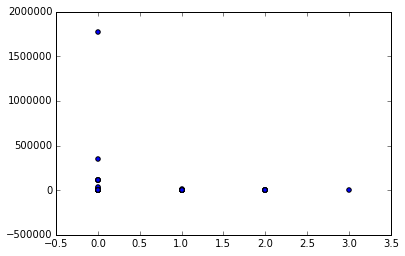

In [41]:
%matplotlib inline
plt.scatter(mentions_followers_df.user_mentions, mentions_followers_df.followers_count)

In [47]:

# The Yahoo! Where On Earth ID of Canada is 23424775.
# Use it to find Twitter trends in Canada and compare it to US trends. What's the difference between them?
# Insert the last 100 tweets for all Canada-only trends into a canada collection.
# Insert the last 100 tweets for all US-only trends into a us collections.
# For this (small and not very representative) sample, which users have the highest follower_count?

CANADA_WOE_ID = 23424775

canada_trends = twitter_api.trends.place(_id=CANADA_WOE_ID)

canada_trends_set = set([trend['name'] for trends in canada_trends
                     for trend in trends['trends']]) 

In [48]:
us_trends_set.difference(canada_trends_set) # us_trends_set - canada_trends_set

{u'#5HFanuaryDay23',
 u'#AskWeeklyChris',
 u'#ImHomeFridayNightBecause',
 u'#NHLAllStarDraft',
 u'Mark Giordano',
 u'Ms. D',
 u'Run Monroe',
 u'Sunjai',
 u'Zatia'}

In [49]:
canada_trends_set.difference(us_trends_set) # canada_trends_set - us_trends_set

{u'#LeafsIn5Words',
 u'#NHLAllStar',
 u'#TeamToews',
 u'#pharmacists',
 u'Brent Burns',
 u'Lowry',
 u'Ovechkin',
 u'Phil Kessel',
 u'Pierre McGuire'}

In [54]:
# Insert the last 100 tweets for all Canada-only trends into a canada collection.
canada_tweet_collection = []

for t in canada_trends:
    q = t['trends'][0]['name']
    search_results = twitter_api.search.tweets(q=q, count=100)
    canada_tweet_collection += search_results['statuses']


# For this (small and not very representative) sample, which users have the highest follower_count?

In [55]:
len(canada_tweet_collection)

100

In [57]:
canada_tweet_collection[0]

{u'contributors': None,
 u'coordinates': None,
 u'created_at': u'Sat Jan 24 03:03:56 +0000 2015',
 u'entities': {u'hashtags': [{u'indices': [15, 25], u'text': u'TeamToews'},
   {u'indices': [30, 42], u'text': u'TeamFoligno'},
   {u'indices': [43, 54], u'text': u'NHLAllStar'}],
  u'media': [{u'display_url': u'pic.twitter.com/86R0AVUnbX',
    u'expanded_url': u'http://twitter.com/NHL/status/558784978772054016/photo/1',
    u'id': 558784961562820608,
    u'id_str': u'558784961562820608',
    u'indices': [77, 99],
    u'media_url': u'http://pbs.twimg.com/media/B8Ez9kPIQAA_zbE.jpg',
    u'media_url_https': u'https://pbs.twimg.com/media/B8Ez9kPIQAA_zbE.jpg',
    u'sizes': {u'large': {u'h': 768, u'resize': u'fit', u'w': 1024},
     u'medium': {u'h': 450, u'resize': u'fit', u'w': 600},
     u'small': {u'h': 255, u'resize': u'fit', u'w': 340},
     u'thumb': {u'h': 150, u'resize': u'crop', u'w': 150}},
    u'source_status_id': 558784978772054016,
    u'source_status_id_str': u'55878497877205401

In [58]:
# Insert the last 100 tweets for all US-only trends into a us collections.
us_tweet_collection = []

for t in us_trends:
    q = t['trends'][0]['name']
    search_results = twitter_api.search.tweets(q=q, count=100)
    us_tweet_collection += search_results['statuses']


In [76]:
# For this (small and not very representative) sample, which users have the highest follower_count?
canada_tweets = pd.DataFrame(canada_tweet_collection)[['user']]

In [77]:
canada_tweets.head()

,user
0,"{u'follow_request_sent': False, u'profile_use_..."
1,"{u'follow_request_sent': False, u'profile_use_..."
2,"{u'follow_request_sent': False, u'profile_use_..."
3,"{u'follow_request_sent': False, u'profile_use_..."
4,"{u'follow_request_sent': False, u'profile_use_..."


In [79]:
us_tweets = pd.DataFrame(us_tweet_collection)[['user']]
us_tweets.head()

,user
0,"{u'follow_request_sent': False, u'profile_use_..."
1,"{u'follow_request_sent': False, u'profile_use_..."
2,"{u'follow_request_sent': False, u'profile_use_..."
3,"{u'follow_request_sent': False, u'profile_use_..."
4,"{u'follow_request_sent': False, u'profile_use_..."
